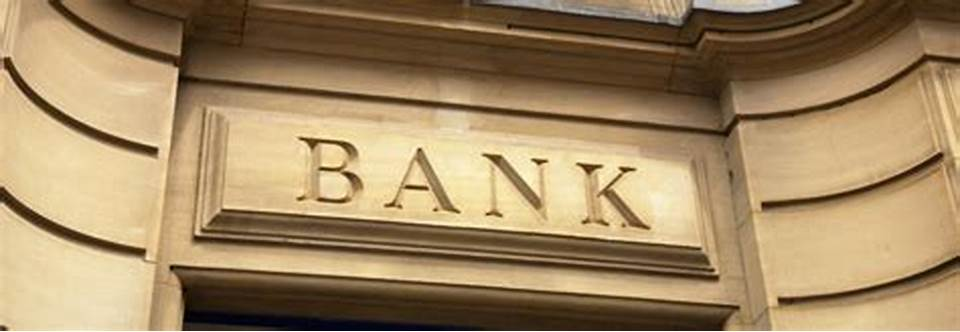

**Introduction:**



Hello everyone. I am creating This notebook to predict the customer churn rate, which is a classification problem. My goal is to ensure that after reading this notebook, you will have a complete understanding of the data. I will use a random forest classifier for prediction, and the code in this notebook will be kept very basic. I will make every effort to ensure that the code does not seem complex

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

**> Import All Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.decomposition import PCA


* IMPORT THE DATA

**Data Description:**
*     CustomerId: A unique identifier for each customer.
 
* Surname: The family name of the customer, providing information about the customer's last name.
 
* CreditScore: Represents the creditworthiness of a customer, with higher scores indicating better creditworthiness.
 
* Geography: Indicates the country or region where the customer.
 
* Gender: Specifies the gender of the customer.
 
* Age: Represents the age of the customer.
 
* Tenure: Refers to the number of years the customer has been with the bank or using the services.
 
* Balance: Indicates the amount of money held in the customer's account or financial balance.
 
* NumOfProducts: Represents the number of financial products or services the customer has with the bank.
 
* HasCrCard: Binary feature indicating whether the customer has a credit card (1 if true, 0 if false).
 
* IsActiveMember: Binary feature indicating whether the customer is an active member (1 if true, 0 if false).
 
* EstimatedSalary: Provides an estimate of the customer's salary.

* Exited: The target variable; binary (1 or 0) indicating whether the customer exited or not (churned or retained).
    

In [3]:
data = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

**Train and Test Data Columns Name**

In [4]:
data.shape
# 165034 rows and 14 rows 
# 13 rows 

(165034, 14)

In [5]:
data.sample(10)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
164498,164498,15672905,Chinwemma,557,Germany,Female,32.0,9,104584.16,1,1.0,0.0,172646.88,0
143606,143606,15711398,Fetherstonhaugh,525,France,Female,25.0,5,0.00,2,1.0,1.0,89566.64,0
6432,6432,15568849,Hsia,604,France,Female,44.0,9,0.00,1,1.0,0.0,80764.28,1
12527,12527,15602282,Fiorentini,646,Germany,Male,74.0,1,160858.13,1,0.0,1.0,158610.89,0
42118,42118,15665829,Harker,678,Spain,Male,32.0,4,0.00,2,1.0,0.0,148087.32,0
131132,131132,15807906,Ch'ien,521,France,Male,34.0,8,0.00,2,1.0,1.0,79240.80,0
119443,119443,15671915,Onyemere,707,Spain,Male,43.0,10,0.00,2,1.0,0.0,167873.49,0
46112,46112,15578515,Onyemauchechukwu,559,France,Male,34.0,5,0.00,2,1.0,1.0,123096.96,0
14651,14651,15569264,Ts'ai,592,France,Female,46.0,2,0.00,1,1.0,0.0,120105.61,1
145628,145628,15677908,Gilbert,552,Spain,Male,42.0,4,0.00,3,0.0,0.0,195692.30,1


In [6]:
data.isnull().sum()
# There is not a single null value in the data

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
data_test.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [8]:
# Information of all Columns Dtype 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [9]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               110023 non-null  int64  
 1   CustomerId       110023 non-null  int64  
 2   Surname          110023 non-null  object 
 3   CreditScore      110023 non-null  int64  
 4   Geography        110023 non-null  object 
 5   Gender           110023 non-null  object 
 6   Age              110023 non-null  float64
 7   Tenure           110023 non-null  int64  
 8   Balance          110023 non-null  float64
 9   NumOfProducts    110023 non-null  int64  
 10  HasCrCard        110023 non-null  float64
 11  IsActiveMember   110023 non-null  float64
 12  EstimatedSalary  110023 non-null  float64
dtypes: float64(5), int64(5), object(3)
memory usage: 10.9+ MB


In [10]:
data[data.duplicated()]
# Zero Duplicated Value in Data 

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


****DROP ID , CUSTOMER ID AND SURNAME COLUMNS ****

* The reason for dropping the 'id' column is that its values are similar to an index.

* We expect Customer ID to be unique because we are predicting bank churn rates. Based on my knowledge, Customer IDs are usually unique and should not be repeated. However, in our data, we observe duplicate Customer IDs, so we will drop those duplicates.


In [11]:
data['CustomerId'].value_counts()
# In CustomerId Many Values Are Repeted But in general 

15682355    121
15570194     99
15585835     98
15595588     91
15648067     90
           ... 
15635203      1
15806982      1
15691104      1
15624936      1
15815050      1
Name: CustomerId, Length: 23221, dtype: int64

In [12]:
data.drop(['CustomerId','id','Surname'],axis=1,inplace=True)
data_test.drop(['CustomerId','id','Surname'],axis=1,inplace=True)

In [13]:
data[data.duplicated()]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
14256,595,Spain,Male,35.0,8,0.00,1,0.0,1.0,100015.79,0
14736,535,France,Male,33.0,3,133040.32,1,1.0,1.0,110299.78,0
21512,449,Spain,Female,33.0,8,0.00,2,1.0,0.0,156792.89,0
27134,532,France,Male,36.0,4,0.00,1,1.0,1.0,132798.78,0
30350,731,France,Male,43.0,2,0.00,2,1.0,1.0,170034.95,0
...,...,...,...,...,...,...,...,...,...,...,...
163101,749,France,Male,49.0,1,139290.41,1,1.0,0.0,182855.42,0
163785,589,Spain,Male,45.0,1,0.00,2,0.0,0.0,125939.22,0
164350,614,Spain,Male,66.0,2,0.00,2,1.0,1.0,180082.70,0
164596,682,France,Male,37.0,5,0.00,2,1.0,1.0,112554.68,0


In [14]:
data = data.drop_duplicates()

**DESCRIBE ALL DATA**

**CreditScore:**
The credit scores range from 350 to 850.
The average credit score is around 656.

**Age:**
Customer ages range from 18 to 92.
The average age is approximately 38 years.

**Tenure:**
The tenure (number of years with the bank) ranges from 0 to 10.
The average tenure is about 5 years.

**Balance:**
Account balances vary, with a minimum of 0 and a maximum of 250,898.09.
The average balance is around 55,481.14.

**NumOfProducts:**
The number of bank products used by customers ranges from 1 to 4.
The average number of products is approximately 1.55.

**HasCrCard:**
Indicates whether a customer has a credit card (1) or not (0).
The majority of customers (around 75%) have a credit card.

**IsActiveMember:**
Reflects whether a customer is an active member (1) or not (0).
Approximately 50% of customers are active members.

**EstimatedSalary:**
Estimated salaries of customers vary, with a minimum of 11.58 and a maximum of 199,992.48.
The average estimated salary is around 112,579.80.

**Exited:**
This binary variable indicates whether a customer exited the bank (1) or not (0).
The exit rate is around 21.17%.

In [15]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,164911.000000,164911.000000,164911.000000,164911.000000,164911.000000,164911.000000,164911.000000,164911.000000,164911.000000
mean,656.468914,38.124278,5.020599,55481.138955,1.554420,0.753916,0.497693,112579.798396,0.211684
std,80.091065,8.865020,2.806237,62819.233625,0.547171,0.430730,0.499996,50290.229424,0.408503
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74639.870000,0.000000
50%,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,710.000000,42.000000,7.000000,119948.090000,2.000000,1.000000,1.000000,155155.250000,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [16]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

**VALUE_COUNTS _OF_COLUMNS**

In [17]:
columns = ['Geography', 'Gender', 'Tenure','NumOfProducts', 'HasCrCard', 'IsActiveMember','Exited']
for i in columns:
    print('--' * 50)
    print(f"Unique values and their counts for column {i}:")
    print(round(data[i].value_counts(normalize=True)*100))

----------------------------------------------------------------------------------------------------
Unique values and their counts for column Geography:
France     57.0
Spain      22.0
Germany    21.0
Name: Geography, dtype: float64
----------------------------------------------------------------------------------------------------
Unique values and their counts for column Gender:
Male      56.0
Female    44.0
Name: Gender, dtype: float64
----------------------------------------------------------------------------------------------------
Unique values and their counts for column Tenure:
2     11.0
7     11.0
4     11.0
8     11.0
5     10.0
1     10.0
9     10.0
3     10.0
6     10.0
10     4.0
0      3.0
Name: Tenure, dtype: float64
----------------------------------------------------------------------------------------------------
Unique values and their counts for column NumOfProducts:
2    51.0
1    47.0
3     2.0
4     0.0
Name: NumOfProducts, dtype: float64
---------------------

In [18]:
data.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
164254,780,France,Male,37.0,3,0.00,2,1.0,0.0,182156.81,0
100493,676,France,Male,32.0,6,144581.99,1,0.0,1.0,48131.77,0
14194,559,France,Male,29.0,1,0.00,2,1.0,0.0,155639.76,0
27715,685,France,Male,37.0,4,112281.60,2,1.0,1.0,115916.55,0
50861,642,Germany,Female,29.0,6,124725.34,2,1.0,0.0,175569.63,1


**CORRELATION**

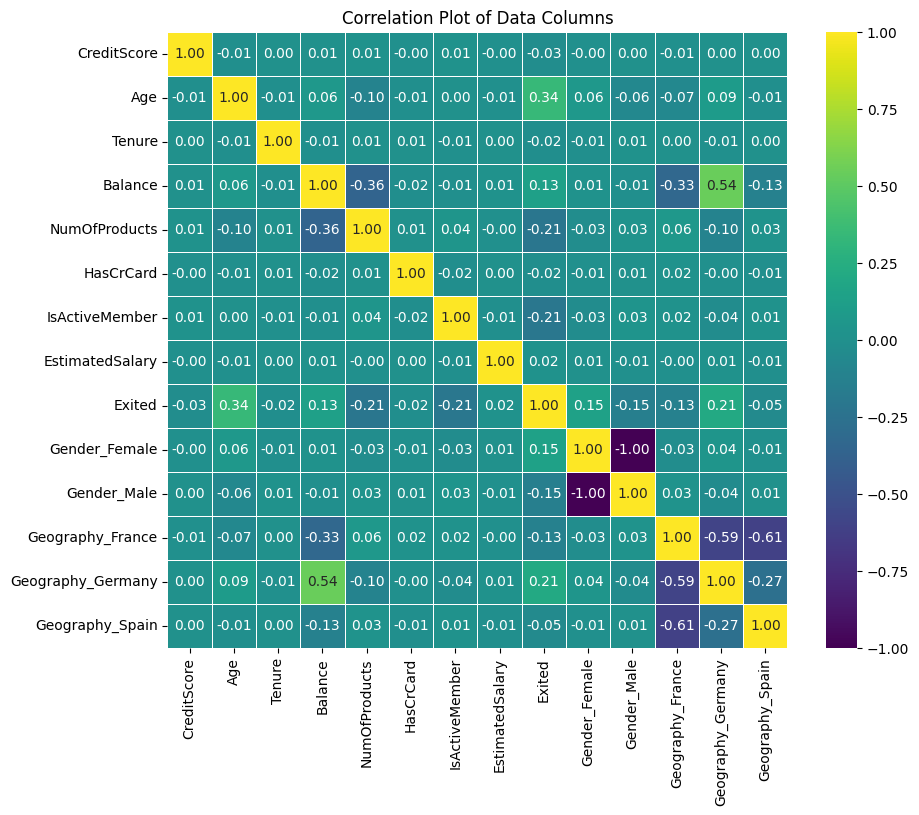

In [19]:
data_encoded = pd.get_dummies(data, columns=['Gender', 'Geography'])


correlation_matrix = data_encoded.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", fmt=".2f", linewidths=.5)
plt.title('Correlation Plot of Data Columns')
plt.show()



# Exploratory Data Analysis (EDA) 

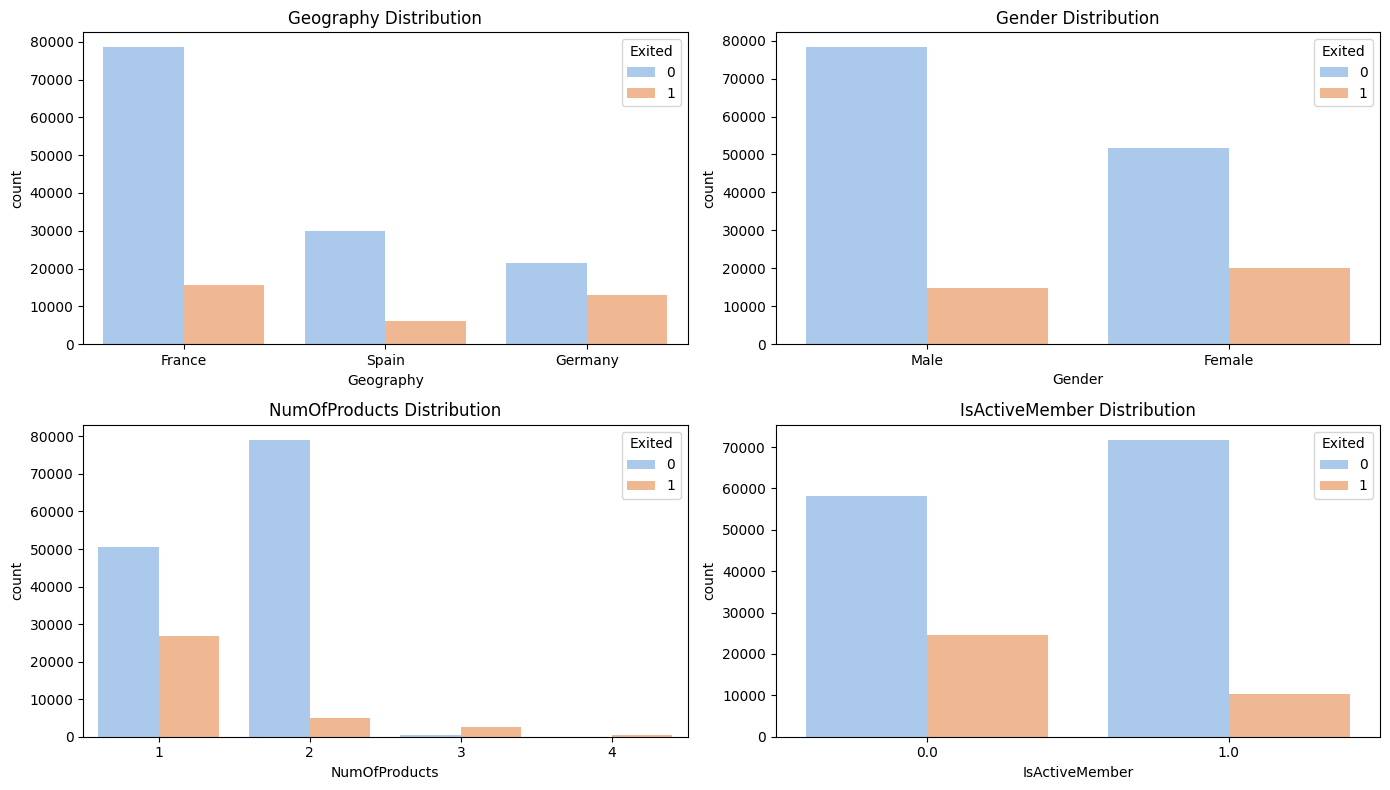

In [20]:

a = data.copy()
b = data_test.copy()
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
sns.countplot(x='Geography', hue='Exited', data=a, palette='pastel')
plt.title('Geography Distribution')

plt.subplot(2, 2, 2)
sns.countplot(x='Gender', hue='Exited', data=a, palette='pastel')
plt.title('Gender Distribution')


plt.subplot(2, 2, 3)
sns.countplot(x='NumOfProducts', hue='Exited', data=a, palette='pastel')
plt.title('NumOfProducts Distribution')


plt.subplot(2, 2, 4)
sns.countplot(x='IsActiveMember', hue='Exited', data=a, palette='pastel')
plt.title('IsActiveMember Distribution')

plt.tight_layout()
plt.show()

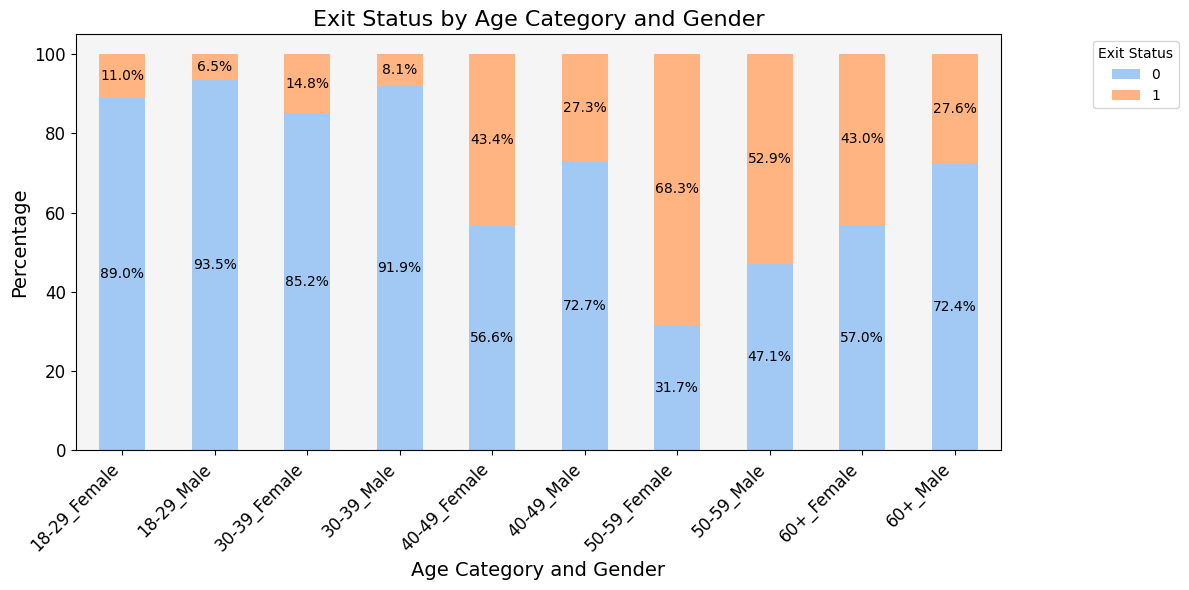

In [21]:


bins = [18, 30, 40, 50, 60, 100]
labels = ['18-29', '30-39', '40-49', '50-59', '60+']
a['age_cat'] = pd.cut(a['Age'], bins=bins, labels=labels, right=False)
a['age_gender'] = a['age_cat'].astype(str) + '_' + a['Gender'].astype(str)

b['age_cat'] = pd.cut(b['Age'], bins=bins, labels=labels, right=False)
b['age_gender'] = b['age_cat'].astype(str) + '_' + b['Gender'].astype(str)

percentage_df = a.groupby(['age_gender', 'Exited']).size().unstack(fill_value=0).apply(lambda x: x / x.sum(), axis=1) * 100

colors = sns.color_palette('pastel')

ax = percentage_df.plot(kind='bar', stacked=True, figsize=(12, 6), color=colors)
plt.title('Exit Status by Age Category and Gender', fontsize=16)
plt.xlabel('Age Category and Gender', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.legend(title='Exit Status', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
ax.set_facecolor('#f5f5f5')  

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()


**observasion**: 
* It can be observed that there are more female customers, and females tend to have a higher exit rate compared to males.

* Among females, those in the age group of 40 years and above have a higher representation, especially in the 50-59 age category, indicating that females in this age range are more likely to exit the bank.

* In the case of males, the 60+ age category stands out with a higher exit rate compared to other age categories, suggesting that males in the 60 and above age group are more prone to exiting the bank.

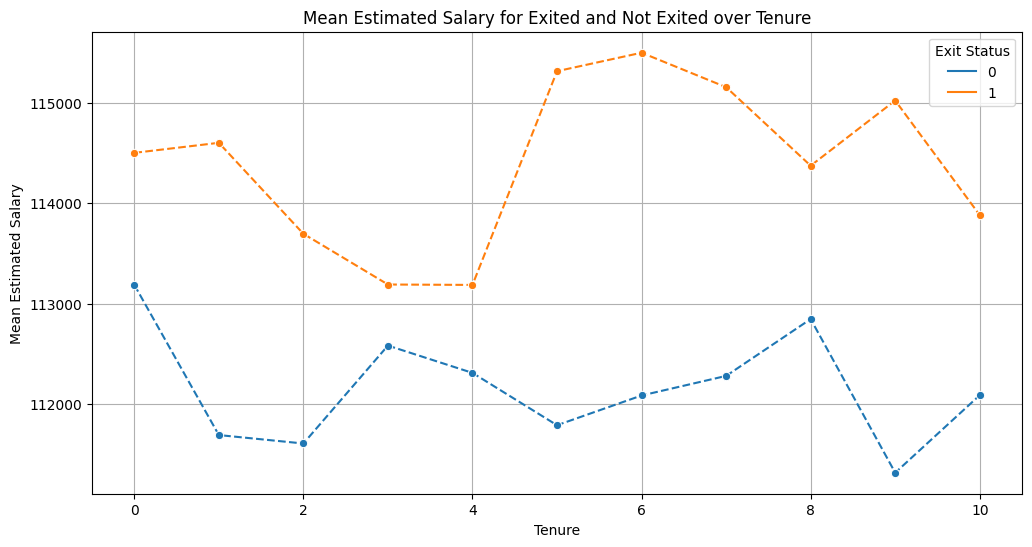

In [22]:


mean_salary_by_tenure = round(a.groupby(['Tenure', 'Exited'])['EstimatedSalary'].mean().reset_index())

plt.figure(figsize=(12, 6))
sns.lineplot(x='Tenure', y='EstimatedSalary', hue='Exited', data=mean_salary_by_tenure, linestyle='dashed',marker='o', dashes=True)
plt.title('Mean Estimated Salary for Exited and Not Exited over Tenure')
plt.xlabel('Tenure')
plt.ylabel('Mean Estimated Salary')
plt.legend(title='Exit Status')
plt.grid(True)
plt.show()


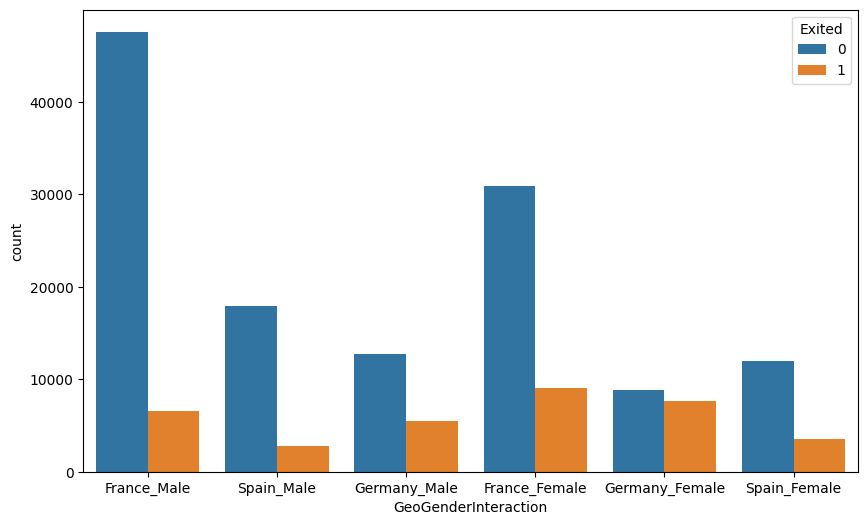

In [23]:

a['GeoGenderInteraction'] = a['Geography'] + "_" + a['Gender']
b['GeoGenderInteraction'] = b['Geography'] + "_" + b['Gender']
plt.figure(figsize=(10, 6))
sns.countplot(x='GeoGenderInteraction', hue='Exited', data=a)
plt.show()


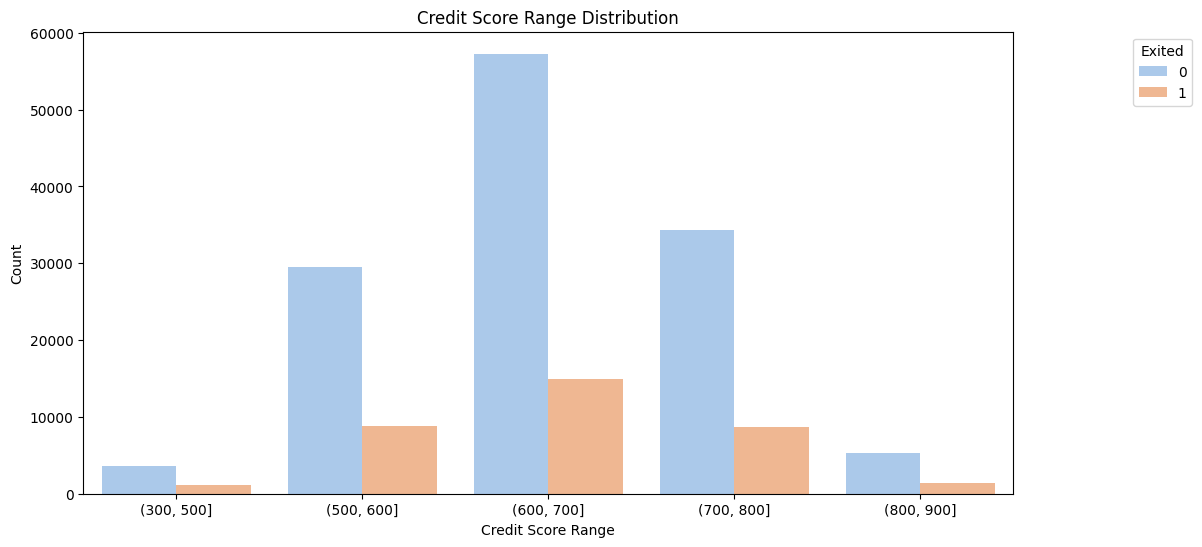

In [24]:

bins = [300, 500, 600, 700, 800, 900]

a['CreditScoreRange'] = pd.cut(a['CreditScore'], bins=bins)
b['CreditScoreRange'] = pd.cut(b['CreditScore'], bins=bins)
plt.figure(figsize=(12, 6))
sns.countplot(x='CreditScoreRange', hue='Exited', data=a, palette='pastel')
plt.title('Credit Score Range Distribution')
plt.xlabel('Credit Score Range')
plt.ylabel('Count')
plt.legend(title='Exited', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()


<AxesSubplot: xlabel='IsActiveMember', ylabel='HasCrCard'>

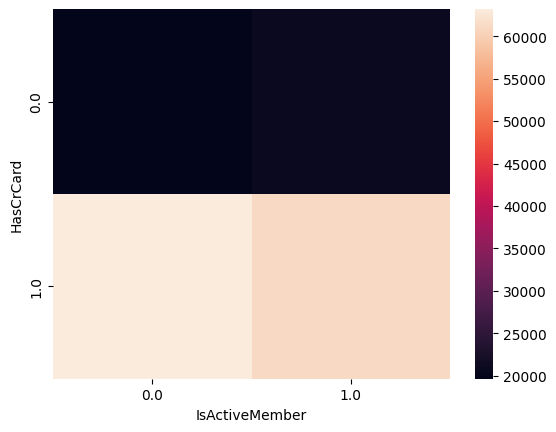

In [25]:
sns.heatmap(pd.crosstab(a['HasCrCard'],a['IsActiveMember']))

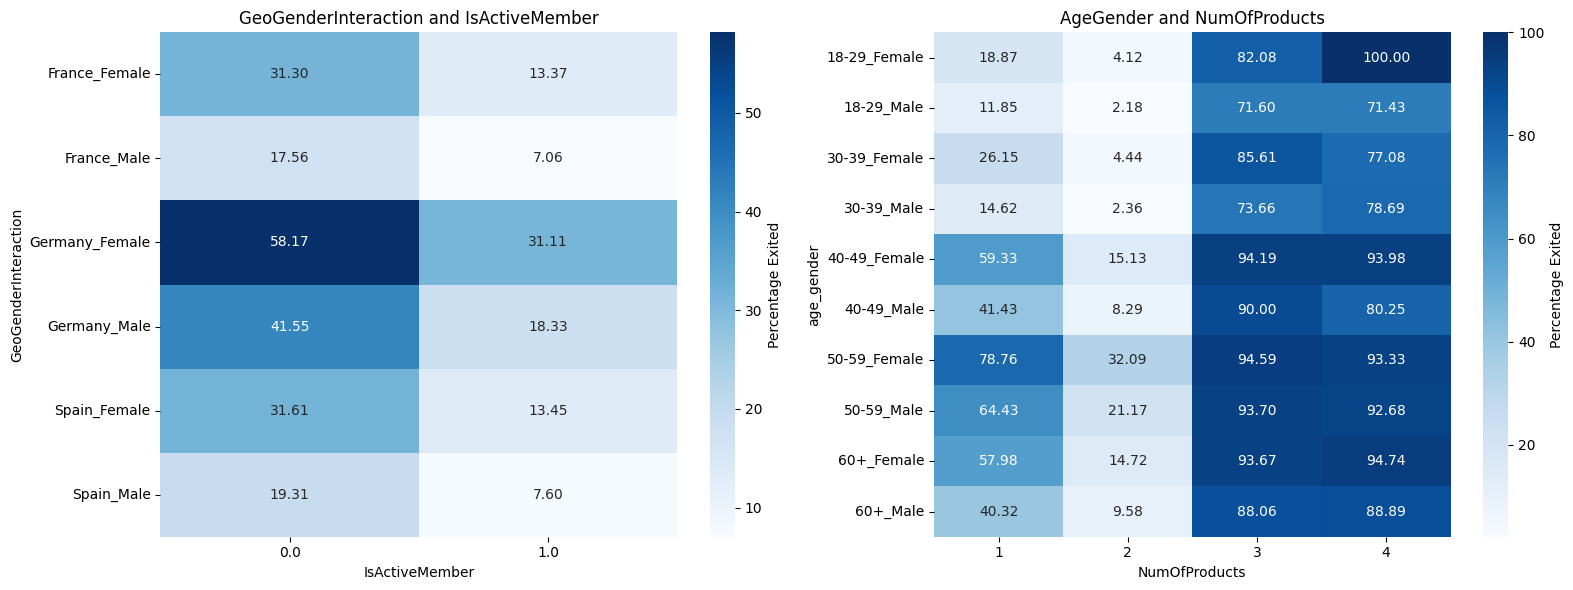

In [26]:

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

percentage_exit_geo_gender = a.groupby(['GeoGenderInteraction', 'IsActiveMember'])['Exited'].mean().reset_index()
pivot_table_geo_gender = pd.pivot_table(percentage_exit_geo_gender, index='GeoGenderInteraction', columns='IsActiveMember', values='Exited')
pivot_table_geo_gender *= 100
sns.heatmap(pivot_table_geo_gender, annot=True, cmap='Blues', fmt=".2f", cbar_kws={'label': 'Percentage Exited'}, ax=axes[0])
axes[0].set_title('GeoGenderInteraction and IsActiveMember')

percentage_exit_age_gender = a.groupby(['age_gender', 'NumOfProducts'])['Exited'].mean().reset_index()
pivot_table_age_gender = pd.pivot_table(percentage_exit_age_gender, index='age_gender', columns='NumOfProducts', values='Exited')
pivot_table_age_gender *= 100
sns.heatmap(pivot_table_age_gender, annot=True, cmap='Blues', fmt=".2f", cbar_kws={'label': 'Percentage Exited'}, ax=axes[1])
axes[1].set_title('AgeGender and NumOfProducts')

plt.tight_layout()
plt.show()


In [27]:
a

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,age_cat,age_gender,GeoGenderInteraction,CreditScoreRange
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0,30-39,30-39_Male,France_Male,"(600, 700]"
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0,30-39,30-39_Male,France_Male,"(600, 700]"
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0,40-49,40-49_Male,France_Male,"(600, 700]"
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0,30-39,30-39_Male,France_Male,"(500, 600]"
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0,30-39,30-39_Male,Spain_Male,"(700, 800]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0,30-39,30-39_Female,Spain_Female,"(600, 700]"
165030,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0,30-39,30-39_Male,France_Male,"(700, 800]"
165031,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0,30-39,30-39_Male,France_Male,"(500, 600]"
165032,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0,30-39,30-39_Female,Spain_Female,"(500, 600]"


In [28]:
a.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'age_cat', 'age_gender', 'GeoGenderInteraction',
       'CreditScoreRange'],
      dtype='object')

In [29]:
a.drop(['Gender','Geography','age_cat','CreditScore'],axis=1,inplace=True)

In [30]:
a

,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,age_gender,GeoGenderInteraction,CreditScoreRange
0,33.0,3,0.00,2,1.0,0.0,181449.97,0,30-39_Male,France_Male,"(600, 700]"
1,33.0,1,0.00,2,1.0,1.0,49503.50,0,30-39_Male,France_Male,"(600, 700]"
2,40.0,10,0.00,2,1.0,0.0,184866.69,0,40-49_Male,France_Male,"(600, 700]"
3,34.0,2,148882.54,1,1.0,1.0,84560.88,0,30-39_Male,France_Male,"(500, 600]"
4,33.0,5,0.00,2,1.0,1.0,15068.83,0,30-39_Male,Spain_Male,"(700, 800]"
...,...,...,...,...,...,...,...,...,...,...,...
165029,33.0,2,0.00,1,1.0,1.0,131834.75,0,30-39_Female,Spain_Female,"(600, 700]"
165030,35.0,3,0.00,1,0.0,0.0,131834.45,0,30-39_Male,France_Male,"(700, 800]"
165031,31.0,5,0.00,1,1.0,1.0,127429.56,0,30-39_Male,France_Male,"(500, 600]"
165032,30.0,7,161533.00,1,0.0,1.0,71173.03,0,30-39_Female,Spain_Female,"(500, 600]"


In [31]:
ordinal_columns = ['CreditScoreRange']
encoder = OrdinalEncoder()
a[ordinal_columns] = encoder.fit_transform(a[ordinal_columns])
a= pd.get_dummies(a, columns=['age_gender','GeoGenderInteraction'],drop_first=True).astype(int)
# b[ordinal_columns] = encoder.fit_transform(b[ordinal_columns])
# b= pd.get_dummies(b, columns=['Geography', 'Gender','age_gender','GeoGenderInteraction'],drop_first=True).astype(int)


In [32]:


numeric_columns = ['Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler = StandardScaler()
a[numeric_columns] = scaler.fit_transform(a[numeric_columns])
# b[numeric_columns] = scaler.fit_transform(b[numeric_columns])


In [33]:
X = a.drop('Exited',axis=1)
y = a['Exited']




# n_components = 12
# pca = PCA(n_components=n_components)
# X_pca = pca.fit_transform(X)
# columns_pca = [f'PC{i}' for i in range(1, n_components + 1)]
# X_pca_df = pd.DataFrame(data=X_pca, columns=columns_pca)


In [34]:
# x_train,x_test,y_train,y_test = train_test_split(X_pca,y,test_size=0.2,random_state=42)

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [35]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# rf_classifier = RandomForestClassifier()

# grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')
# grid_search.fit(x_train, y_train)

# print("Best Hyperparameters:", grid_search.best_params_)

# best_rf_model = grid_search.best_estimator_
# accuracy_on_holdout = best_rf_model.score(x_test, y_test)
# print("Accuracy on Holdout Set:", accuracy_on_holdout)


In [36]:
# aaaaaaaaaaaaaaaaaaa

In [37]:
lr = RandomForestClassifier(n_estimators=100,random_state=42,max_depth=20,min_samples_split=5,min_samples_leaf=2)

In [38]:
lr.fit(x_train,y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=5,
                       random_state=42)

In [39]:
y_pred = lr.predict(x_test)

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8615953673104326

In [41]:
lr.feature_importances_

array([0.20352257, 0.06651123, 0.11093983, 0.20082187, 0.01158148,
       0.07002438, 0.13147551, 0.03493277, 0.0060605 , 0.00578439,
       0.01973369, 0.02191773, 0.00726395, 0.03755227, 0.00907351,
       0.00201352, 0.00180378, 0.01237414, 0.02813518, 0.0094548 ,
       0.00432482, 0.00469807])

In [42]:
x_train.columns

Index(['Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'CreditScoreRange',
       'age_gender_18-29_Male', 'age_gender_30-39_Female',
       'age_gender_30-39_Male', 'age_gender_40-49_Female',
       'age_gender_40-49_Male', 'age_gender_50-59_Female',
       'age_gender_50-59_Male', 'age_gender_60+_Female', 'age_gender_60+_Male',
       'GeoGenderInteraction_France_Male',
       'GeoGenderInteraction_Germany_Female',
       'GeoGenderInteraction_Germany_Male',
       'GeoGenderInteraction_Spain_Female', 'GeoGenderInteraction_Spain_Male'],
      dtype='object')

In [43]:
# n_components = 10  
# pca = PCA(n_components=n_components)
# X_pca = pca.fit_transform(X)
# X_pca_b = pca.fit_transform(b)
# columns_pca = [f'PC{i}' for i in range(1, n_components + 1)]
# X_pca_df = pd.DataFrame(data=X_pca, columns=columns_pca)
# columns_pca_b = [f'PC{i}' for i in range(1, n_components + 1)]
# X_pca_df_b = pd.DataFrame(data=X_pca_b, columns=columns_pca)
# # x_train,x_test,y_train,y_test = train_test_split(X_pca_df,y,random_state=42,test_size=0.2)
# lr = RandomForestClassifier()

In [44]:
# lr.fit(X_pca_df,y)

In [45]:
# y_pred = lr.predict_proba(X_pca_df_b)

Submmison

In [46]:
# submison = submission.drop('Exited',axis=1)
# submmison = lr.predict_proba(X_pca_df_b)[:, 1]

In [47]:
# submison['Exited'] = submmison

In [48]:
# submison

In [49]:
# submison.to_csv(r"submission.csv", index=False)